In [61]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , Flatten , MaxPooling2D,BatchNormalization,Dropout

In [64]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=r'archive/trainingSample/trainingSample',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(28, 28),
    color_mode='grayscale',  # Load images as grayscale
    validation_split=0.3,
    subset="training",
    seed=123
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory=r'archive/trainingSample/trainingSample',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(28, 28),
    color_mode='grayscale',  # Load images as grayscale
    validation_split=0.3,
    subset="validation",
    seed=123
)


Found 600 files belonging to 10 classes.
Using 300 files for training.
Found 600 files belonging to 10 classes.
Using 300 files for validation.


In [65]:
def process_input(image,label):
    image = tf.cast(image/255.0,tf.float32)
    return image,label

train_ds = train_ds.map(process_input)
valid_ds  = valid_ds.map(process_input)

In [79]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the output for the Dense layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
# Output Layer (10 classes for MNIST, with softmax activation)
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,314 (1.49 MB)

 Trainable params: 389,418 (1.49 MB)

 Non-trainable params: 896 (3.50 KB)

In [80]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [81]:
history  = model.fit(train_ds,epochs = 60 ,validation_data = valid_ds )

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.1949 - loss: 2.2812 - val_accuracy: 0.3867 - val_loss: 2.2769
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6558 - loss: 1.1027 - val_accuracy: 0.2733 - val_loss: 2.2337
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8609 - loss: 0.5456 - val_accuracy: 0.2100 - val_loss: 2.2312
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9051 - loss: 0.3633 - val_accuracy: 0.1333 - val_loss: 2.2465
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9616 - loss: 0.2068 - val_accuracy: 0.1233 - val_loss: 2.2678
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9685 - loss: 0.1099 - val_accuracy: 0.1233 - val_loss: 2.2965
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9567 - loss: 0.1368 - val_accuracy: 0.1233 - val_loss: 2.3404
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9851 - loss: 0.0735 - val_accuracy: 0.1233 - v

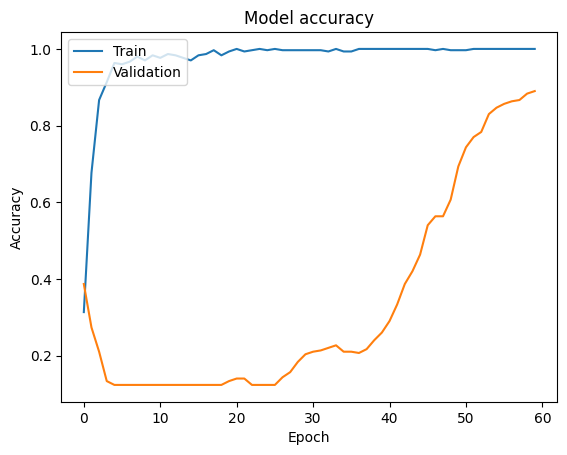

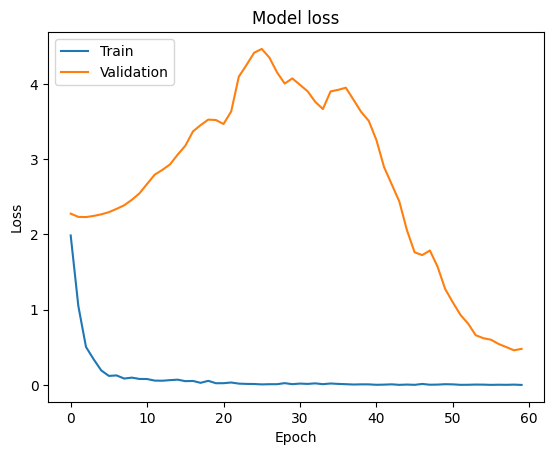

In [82]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


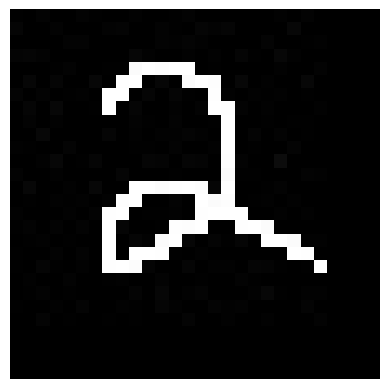

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class: 2


In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
test_img = cv2.imread(r'C:\Users\HP\Desktop\TT.jpg')
# Check if the image was loaded correctly
if test_img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to grayscale
    test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    test_img_resized = cv2.resize(test_img_gray, (28, 28))

    # Normalize the image to [0, 1]
    test_img_normalized = test_img_resized / 255.0

    # Add batch dimension and channel dimension
    test_img_input = np.expand_dims(test_img_normalized, axis=(0, -1))

    # Display the preprocessed image
    plt.imshow(test_img_input[0, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

    # Make predictions
    predictions = model.predict(test_img_input)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the prediction
    print(f"Predicted class: {predicted_class}")


In [60]:
predictions

array([[4.6431794e-07, 9.9841952e-07, 9.9988043e-01, 7.6489676e-05,
        8.0656209e-06, 1.5275170e-08, 1.4260506e-07, 2.3204224e-05,
        1.0221418e-05, 5.8137491e-08]], dtype=float32)

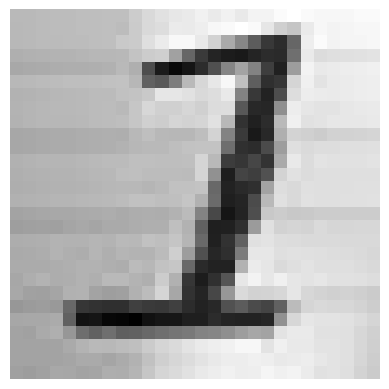

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: 1


In [116]:
test_img = cv2.imread(r'C:\Users\HP\Desktop\test2.jpg')
# Check if the image was loaded correctly
if test_img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to grayscale
    test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    test_img_resized = cv2.resize(test_img_gray, (28, 28))

    # Normalize the image to [0, 1]
    test_img_normalized = test_img_resized / 255.0

    # Add batch dimension and channel dimension
    test_img_input = np.expand_dims(test_img_normalized, axis=(0, -1))

    # Display the preprocessed image
    plt.imshow(test_img_input[0, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

    # Make predictions
    predictions = model.predict(test_img_input)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the prediction
    print(f"Predicted class: {predicted_class}")

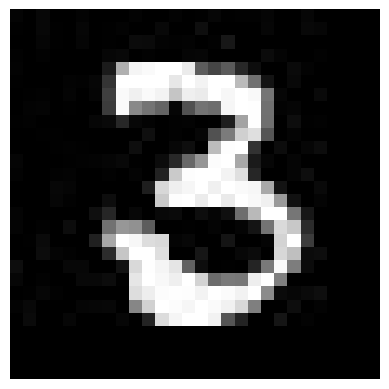

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 3


In [121]:
test_img = cv2.imread(r'C:\Users\HP\Desktop\try3.jpg')
# Check if the image was loaded correctly
if test_img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to grayscale
    test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    test_img_resized = cv2.resize(test_img_gray, (28, 28))

    # Normalize the image to [0, 1]
    test_img_normalized = test_img_resized / 255.0

    # Add batch dimension and channel dimension
    test_img_input = np.expand_dims(test_img_normalized, axis=(0, -1))

    # Display the preprocessed image
    plt.imshow(test_img_input[0, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

    # Make predictions
    predictions = model.predict(test_img_input)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the prediction
    print(f"Predicted class: {predicted_class}")

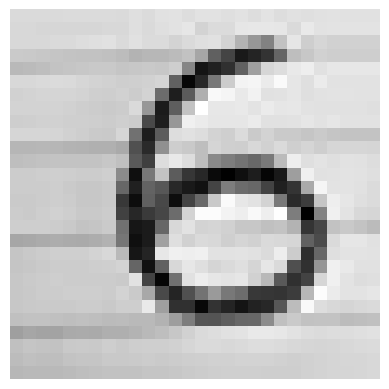

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: 1


In [122]:
test_img = cv2.imread(r'C:\Users\HP\Desktop\try2.jpg')
# Check if the image was loaded correctly
if test_img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to grayscale
    test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    test_img_resized = cv2.resize(test_img_gray, (28, 28))

    # Normalize the image to [0, 1]
    test_img_normalized = test_img_resized / 255.0

    # Add batch dimension and channel dimension
    test_img_input = np.expand_dims(test_img_normalized, axis=(0, -1))

    # Display the preprocessed image
    plt.imshow(test_img_input[0, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

    # Make predictions
    predictions = model.predict(test_img_input)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the prediction
    print(f"Predicted class: {predicted_class}")